In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
    print("\nFluid Solution:\n")
    print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

Expected cost for c = 0 case: 2.703
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 8 nonzeros
Model fingerprint: 0xe1753d8c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 8e-01]
Presolve removed 4 rows and 4 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6025060e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.602506012e+00
Objective Value: 2.60
x:  [[0.60021875 0.16715862]
 [0.23262263 0.        ]]

Fluid Solution:

{'Cost': 2.6025060120662493, 'X_matrix': array([[0.60021875, 0.16715862],
       [0.

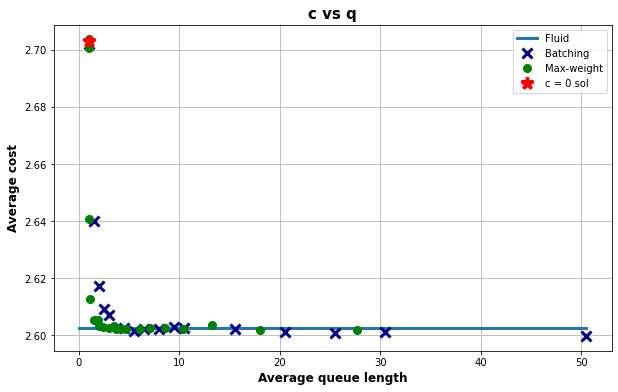

In [4]:
plot_from_sim_paths("../sim_paths_random_2.pkl")

In [3]:
with open("../sim_paths_random_2.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [6]:
pmf_serv

array([0.83284138, 0.16715862])

In [5]:
W

array([[2.57353889, 2.95659375],
       [2.42280636, 5.37940011]])

### Using basic setup for N = 2

Expected cost for c = 0 case: 2.703
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 8 nonzeros
Model fingerprint: 0xfef814be
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 8e-01]
Presolve removed 4 rows and 4 columns
Presolve time: 0.05s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6025060e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.05 seconds (0.00 work units)
Optimal objective  2.602506014e+00
Objective Value: 2.60
x:  [[0.60021875 0.16715862]
 [0.23262263 0.        ]]

Fluid Solu

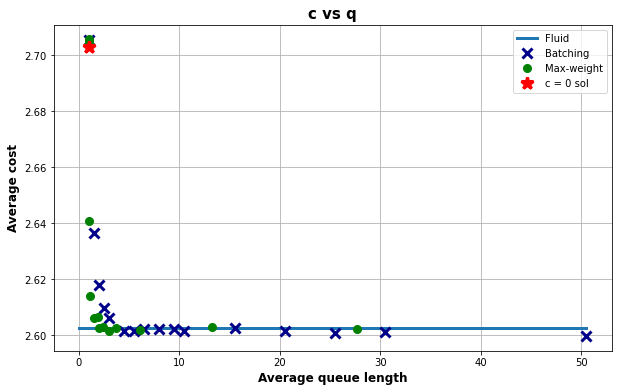

In [4]:
import pickle
frac = 0
with open('../max_weight_random_2.pkl','rb') as f:
    Qpaths,Cpaths, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = Qpaths
C_paths_M = Cpaths
with open('../sim_paths_random_2_batch.pkl','rb') as f:
    Qpaths,Cpaths, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_B = Qpaths
C_paths_B = Cpaths
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M,frac)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B,frac)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)